In [2]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd

In [4]:
import sys
print(sys.executable)


c:\Users\samya.taqi\AppData\Local\anaconda3\python.exe


In [5]:
!c:/Users/samya.taqi/AppData/Local/anaconda3/python.exe -m pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 16.6 MB/s eta 0:00:00


In [10]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [11]:
from mlxtend.frequent_patterns import apriori,association_rules

In [12]:
data = {'ID':[1,2,3,4,5,6],
       'Onion':[1,0,0,1,1,1],
       'Potato':[1,1,0,1,1,1],
       'Burger':[1,1,0,0,1,1],
       'Milk':[0,1,1,1,0,1],
       'Beer':[0,0,1,0,1,0]}

In [ ]:
#____on transforme liste en tableau structuré 
df = pd.DataFrame(data)
df = df[['ID', 'Onion', 'Potato', 'Burger', 'Milk', 'Beer' ]]#et ignore tout les colonnes qui pourraient être exister, ne garde que les colonnes nécessaires 
df

,ID,Onion,Potato,Burger,Milk,Beer
0,1,1,1,1,0,0
1,2,0,1,1,1,0
2,3,0,0,0,1,1
3,4,1,1,0,1,0
4,5,1,1,1,0,1
5,6,1,1,1,1,0


In [ ]:
frequent_itemsets = apriori(df[['Onion', 'Potato', 'Burger', 'Milk', 'Beer' ]], min_support=0.50, use_colnames=True)#applique l'algorithme apriori
frequent_itemsets#use_colnames=True le résultat montre les noms de produits n'est pas les indices 

c:\Users\samya.taqi\AppData\Local\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.666667,(Onion)
1,0.833333,(Potato)
2,0.666667,(Burger)
3,0.666667,(Milk)
4,0.666667,"(Onion, Potato)"
5,0.500000,"(Burger, Onion)"
6,0.666667,"(Burger, Potato)"
7,0.500000,"(Milk, Potato)"
8,0.500000,"(Burger, Onion, Potato)"


In [16]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)#threshold seuil metric mesure
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Onion),(Potato),0.666667,0.833333,0.666667,1.00,1.200,1.0,0.111111,inf,0.500000,0.8,1.00,0.90
1,(Potato),(Onion),0.833333,0.666667,0.666667,0.80,1.200,1.0,0.111111,1.666667,1.000000,0.8,0.40,0.90
2,(Burger),(Onion),0.666667,0.666667,0.500000,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.75
3,(Onion),(Burger),0.666667,0.666667,0.500000,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.75
4,(Burger),(Potato),0.666667,0.833333,0.666667,1.00,1.200,1.0,0.111111,inf,0.500000,0.8,1.00,0.90
5,(Potato),(Burger),0.833333,0.666667,0.666667,0.80,1.200,1.0,0.111111,1.666667,1.000000,0.8,0.40,0.90
6,"(Onion, Burger)",(Potato),0.500000,0.833333,0.500000,1.00,1.200,1.0,0.083333,inf,0.333333,0.6,1.00,0.80
7,"(Burger, Potato)",(Onion),0.666667,0.666667,0.500000,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.75
8,"(Onion, Potato)",(Burger),0.666667,0.666667,0.500000,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.75
9,(Burger),"(Onion, Potato)",0.666667,0.666667,0.500000,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.75


In [ ]:
#filtre on garde que qui on le lift >1.125 et confidence >0.8
rules [ (rules['lift'] >1.125)  & (rules['confidence']> 0.8)  ]#confidence :chance que B soit acheté si A l’est

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Onion),(Potato),0.666667,0.833333,0.666667,1.0,1.2,1.0,0.111111,inf,0.500000,0.8,1.0,0.9
4,(Burger),(Potato),0.666667,0.833333,0.666667,1.0,1.2,1.0,0.111111,inf,0.500000,0.8,1.0,0.9
6,"(Onion, Burger)",(Potato),0.500000,0.833333,0.500000,1.0,1.2,1.0,0.083333,inf,0.333333,0.6,1.0,0.8


#**Exemple2**

In [31]:
retail_shopping_basket = {'ID':[1,2,3,4,5,6],
                         'Basket':[['Beer', 'Diaper', 'Pretzels', 'Chips', 'Aspirin'],
                                   ['Diaper', 'Beer', 'Chips', 'Lotion', 'Juice', 'BabyFood', 'Milk'],
                                   ['Soda', 'Chips', 'Milk'],
                                   ['Soup', 'Beer', 'Diaper', 'Milk', 'IceCream'],
                                   ['Soda', 'Coffee', 'Milk', 'Bread'],
                                   ['Beer', 'Chips']
                                  ]
                         }
retail = pd.DataFrame(retail_shopping_basket)
retail = retail[['ID', 'Basket']]
pd.options.display.max_colwidth=100#pandas coupe les textes longs dans les cellules lorsqu’on affiche un DataFrame.
#augmente la largeur maximale d’affichage à 100 caractères par cellule
retail

,ID,Basket
0,1,"[Beer, Diaper, Pretzels, Chips, Aspirin]"
1,2,"[Diaper, Beer, Chips, Lotion, Juice, BabyFood, Milk]"
2,3,"[Soda, Chips, Milk]"
3,4,"[Soup, Beer, Diaper, Milk, IceCream]"
4,5,"[Soda, Coffee, Milk, Bread]"
5,6,"[Beer, Chips]"


In [33]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
pd.DataFrame(mlb.fit_transform(retail.Basket), columns=mlb.classes_)
'''
str.get_dummies Transforme chaque chaîne en colonnes binaires (0/1) pour chaque produit.
str.join(',')transforme chaque liste en une chaîne de caractères séparée par des virgules.
axis=1 Dans pandas, axis indique la “direction” sur laquelle appliquer une opération.
axis=0 → appliquer l'opération sur les lignes
axis=1 → appliquer l'opération sur les colonnes
'''
retail = retail.drop('Basket' ,axis=1).join(retail.Basket.str.join(',').str.get_dummies(','))
retail

,ID,Aspirin,BabyFood,Beer,Bread,Chips,Coffee,Diaper,IceCream,Juice,Lotion,Milk,Pretzels,Soda,Soup
0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0
1,2,0,1,1,0,1,0,1,0,1,1,1,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,4,0,0,1,0,0,0,1,1,0,0,1,0,0,1
4,5,0,0,0,1,0,1,0,0,0,0,1,0,1,0
5,6,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [37]:
frequent_itemsets_2 = apriori(retail.drop('ID',axis=1), use_colnames=True)
frequent_itemsets_2

c:\Users\samya.taqi\AppData\Local\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.666667,(Beer)
1,0.666667,(Chips)
2,0.500000,(Diaper)
3,0.666667,(Milk)
4,0.500000,"(Beer, Chips)"
5,0.500000,"(Beer, Diaper)"


In [38]:
association_rules(frequent_itemsets_2, metric='lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Beer),(Chips),0.666667,0.666667,0.5,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.60,0.25,0.750
1,(Chips),(Beer),0.666667,0.666667,0.5,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.60,0.25,0.750
2,(Beer),(Diaper),0.666667,0.500000,0.5,0.75,1.500,1.0,0.166667,2.000000,1.000000,0.75,0.50,0.875
3,(Diaper),(Beer),0.500000,0.666667,0.5,1.00,1.500,1.0,0.166667,inf,0.666667,0.75,1.00,0.875


In [39]:
association_rules(frequent_itemsets_2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Diaper),(Beer),0.5,0.666667,0.5,1.0,1.5,1.0,0.166667,inf,0.666667,0.75,1.0,0.875


**Exemple 3 : Movie Genre Associations**

In [42]:
movies = pd.read_csv(r'U:\apriori algorithm\workshoptwo\data\movies.csv', sep=',')

In [43]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [83]:
movies_ohe = movies.drop('genres',axis=1).join(movies.genres.str.get_dummies())
pd.options.display.max_columns=100
movies_ohe.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
'''
.drop(['title', 'movieId'], axis=1) → supprime les colonnes inutiles (title et movieId).
.apply(pd.value_counts) → compte combien de fois chaque valeur apparaît dans chaque colonne 
.transpose() → on transpose pour que les genres deviennent les lignes.
.sort_values(by=1, ascending=False) → trie les genres par le nombre de films qui ont ce genre.
'''
stat1 = movies_ohe.drop(['title', 'movieId'],axis=1).apply(pd.value_counts)
stat1 = stat1.transpose().drop(0,axis=1).sort_values(by=1, ascending=False).rename(columns={1:'No. of movies'})
stat2 = movies.join(movies.genres.str.split('|').reset_index().genres.str.len(), rsuffix='r').rename(columns={'genresr':'genre_count'})
stat2 = stat2[stat2['genre_count']==1].drop(['title','movieId'],axis=1).groupby('genres').sum().sort_values(by='genre_count', ascending=False)
stat = stat1.merge(stat2, how='left', left_index=True, right_index=True).fillna(0)
stat.genre_count=stat.genre_count.astype(int)
stat.rename(columns={'genre_count': 'No. of movies with only 1 genre'},inplace=True)
stat

C:\Users\samya.taqi\AppData\Local\Temp\ipykernel_9904\954227353.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  stat1 = movies_ohe.drop(['title', 'movieId'],axis=1).apply(pd.value_counts)


,No. of movies,No. of movies with only 1 genre
Drama,4365,1170
Comedy,3315,809
Thriller,1729,74
Action,1545,39
Romance,1545,14
Adventure,1117,11
Crime,1100,11
Horror,877,183
Sci-Fi,792,17
Fantasy,654,3


In [87]:
movies_ohe.set_index(['movieId','title']).sum(axis=1).hist()
plt.title('distribution of number of genres')

Text(0.5, 1.0, 'distribution of number of genres')

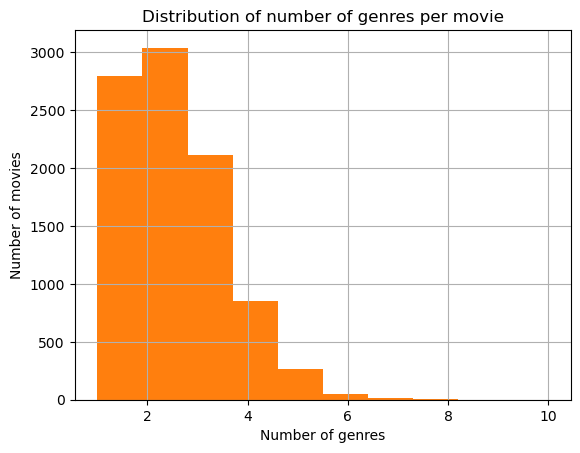

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt

# Sélectionner uniquement les colonnes binaires correspondant aux genres
genre_cols = movies_ohe.columns.difference(['movieId', 'title'])

# Calculer le nombre de genres par film
num_genres_per_movie = movies_ohe[genre_cols].sum(axis=1)

# Tracer l'histogramme
num_genres_per_movie.hist()
plt.title('Distribution of number of genres per movie')
plt.xlabel('Number of genres')
plt.ylabel('Number of movies')
plt.show()


In [88]:
movies_ohe.set_index(['movieId','title'],inplace=True)
frequent_itemsets_movies = apriori(movies_ohe,use_colnames=True, min_support=0.025)
frequent_itemsets_movies

c:\Users\samya.taqi\AppData\Local\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.169315,(Action)
1,0.122411,(Adventure)
2,0.048986,(Animation)
3,0.063890,(Children)
4,0.363288,(Comedy)
5,0.120548,(Crime)
6,0.054247,(Documentary)
7,0.478356,(Drama)
8,0.071671,(Fantasy)
9,0.096110,(Horror)


In [89]:
rules_movies =  association_rules(frequent_itemsets_movies, metric='lift', min_threshold=1.25)
rules_movies

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Action),(Adventure),0.169315,0.122411,0.058301,0.344337,2.812955,1.0,0.037575,1.338475,0.775868,0.249765,0.252881,0.410306
1,(Adventure),(Action),0.122411,0.169315,0.058301,0.476276,2.812955,1.0,0.037575,1.586111,0.734401,0.249765,0.369527,0.410306
2,(Action),(Crime),0.169315,0.120548,0.038247,0.225890,1.873860,1.0,0.017836,1.136081,0.561395,0.152003,0.119781,0.271581
3,(Crime),(Action),0.120548,0.169315,0.038247,0.317273,1.873860,1.0,0.017836,1.216716,0.530264,0.152003,0.178115,0.271581
4,(Action),(Sci-Fi),0.169315,0.086795,0.040986,0.242071,2.789015,1.0,0.026291,1.204870,0.772195,0.190525,0.170035,0.357147
5,(Sci-Fi),(Action),0.086795,0.169315,0.040986,0.472222,2.789015,1.0,0.026291,1.573929,0.702416,0.190525,0.364647,0.357147
6,(Action),(Thriller),0.169315,0.189479,0.062904,0.371521,1.960746,1.0,0.030822,1.289654,0.589863,0.212593,0.224598,0.351752
7,(Thriller),(Action),0.189479,0.169315,0.062904,0.331984,1.960746,1.0,0.030822,1.243510,0.604537,0.212593,0.195825,0.351752
8,(Adventure),(Children),0.122411,0.063890,0.029260,0.239033,3.741299,1.0,0.021439,1.230158,0.834916,0.186322,0.187096,0.348505
9,(Children),(Adventure),0.063890,0.122411,0.029260,0.457976,3.741299,1.0,0.021439,1.619096,0.782722,0.186322,0.382371,0.348505


In [90]:
#______analysing the genre association **
rules_movies[(rules_movies.conviction>1.25)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Action),(Adventure),0.169315,0.122411,0.058301,0.344337,2.812955,1.0,0.037575,1.338475,0.775868,0.249765,0.252881,0.410306
1,(Adventure),(Action),0.122411,0.169315,0.058301,0.476276,2.812955,1.0,0.037575,1.586111,0.734401,0.249765,0.369527,0.410306
5,(Sci-Fi),(Action),0.086795,0.169315,0.040986,0.472222,2.789015,1.0,0.026291,1.573929,0.702416,0.190525,0.364647,0.357147
6,(Action),(Thriller),0.169315,0.189479,0.062904,0.371521,1.960746,1.0,0.030822,1.289654,0.589863,0.212593,0.224598,0.351752
9,(Children),(Adventure),0.063890,0.122411,0.029260,0.457976,3.741299,1.0,0.021439,1.619096,0.782722,0.186322,0.382371,0.348505
11,(Fantasy),(Adventure),0.071671,0.122411,0.030685,0.428135,3.497518,1.0,0.021912,1.534608,0.769213,0.187793,0.348368,0.339403
12,(Sci-Fi),(Adventure),0.086795,0.122411,0.027726,0.319444,2.609607,1.0,0.017101,1.289519,0.675424,0.152778,0.224517,0.272972
14,(Animation),(Children),0.048986,0.063890,0.027068,0.552573,8.648758,1.0,0.023939,2.092205,0.929930,0.315453,0.522035,0.488122
15,(Children),(Animation),0.063890,0.048986,0.027068,0.423671,8.648758,1.0,0.023939,1.650122,0.944736,0.315453,0.393984,0.488122
17,(Children),(Comedy),0.063890,0.363288,0.032877,0.514580,1.416453,1.0,0.009666,1.311672,0.314077,0.083380,0.237615,0.302539


In [91]:
rules_movies[(rules_movies.conviction>1.5)].sort_values(by=['lift','conviction'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
14,(Animation),(Children),0.048986,0.063890,0.027068,0.552573,8.648758,1.0,0.023939,2.092205,0.929930,0.315453,0.522035,0.488122
15,(Children),(Animation),0.063890,0.048986,0.027068,0.423671,8.648758,1.0,0.023939,1.650122,0.944736,0.315453,0.393984,0.488122
9,(Children),(Adventure),0.063890,0.122411,0.029260,0.457976,3.741299,1.0,0.021439,1.619096,0.782722,0.186322,0.382371,0.348505
11,(Fantasy),(Adventure),0.071671,0.122411,0.030685,0.428135,3.497518,1.0,0.021912,1.534608,0.769213,0.187793,0.348368,0.339403
28,(Mystery),(Thriller),0.059507,0.189479,0.036055,0.605893,3.197672,1.0,0.024779,2.056601,0.730758,0.169326,0.513761,0.398088
1,(Adventure),(Action),0.122411,0.169315,0.058301,0.476276,2.812955,1.0,0.037575,1.586111,0.734401,0.249765,0.369527,0.410306
5,(Sci-Fi),(Action),0.086795,0.169315,0.040986,0.472222,2.789015,1.0,0.026291,1.573929,0.702416,0.190525,0.364647,0.357147
20,(Crime),(Thriller),0.120548,0.189479,0.057863,0.480000,2.533256,1.0,0.035022,1.558693,0.688214,0.229465,0.358437,0.392689
34,"(Crime, Drama)",(Thriller),0.067616,0.189479,0.032000,0.473258,2.497673,1.0,0.019188,1.538742,0.643112,0.142162,0.350119,0.321071
24,(War),(Drama),0.040219,0.478356,0.031014,0.771117,1.612015,1.0,0.011775,2.279087,0.395568,0.063610,0.561228,0.417976


In [93]:
pd.options.display.max_rows=50
movies[(movies.genres.str.contains('Adventure')) & (movies.genres.str.contains('Children')) & (~movies.genres.str.contains('Animation'))]

,movieId,title,genres
1,2,Jumanji (1995),Adventure|Children|Fantasy
7,8,Tom and Huck (1995),Adventure|Children
56,60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy
98,107,Muppet Treasure Island (1996),Adventure|Children|Comedy|Musical
114,126,"NeverEnding Story III, The (1994)",Adventure|Children|Fantasy
...,...,...,...
8871,132046,Tomorrowland (2015),Action|Adventure|Children|Mystery|Sci-Fi
8916,135264,Zenon: Girl of the 21st Century (1999),Adventure|Children|Comedy
8917,135266,Zenon: The Zequel (2001),Adventure|Children|Comedy|Sci-Fi
8918,135268,Zenon: Z3 (2004),Adventure|Children|Comedy
